# K MEAN CLUSTERING

# CUSTOMER SEGMENTATION

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Importing the dataset
df=pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Conclusions from the data - 
# 1. No null values
# 2. Gender is of type object rest are of int type

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Conclusions from the data - 
# 1. Average age of customer is 38
# 2. Customers that visit the mall have average age between 18-70
# 3. Average salary is 60k$

<AxesSubplot:xlabel='Age', ylabel='count'>

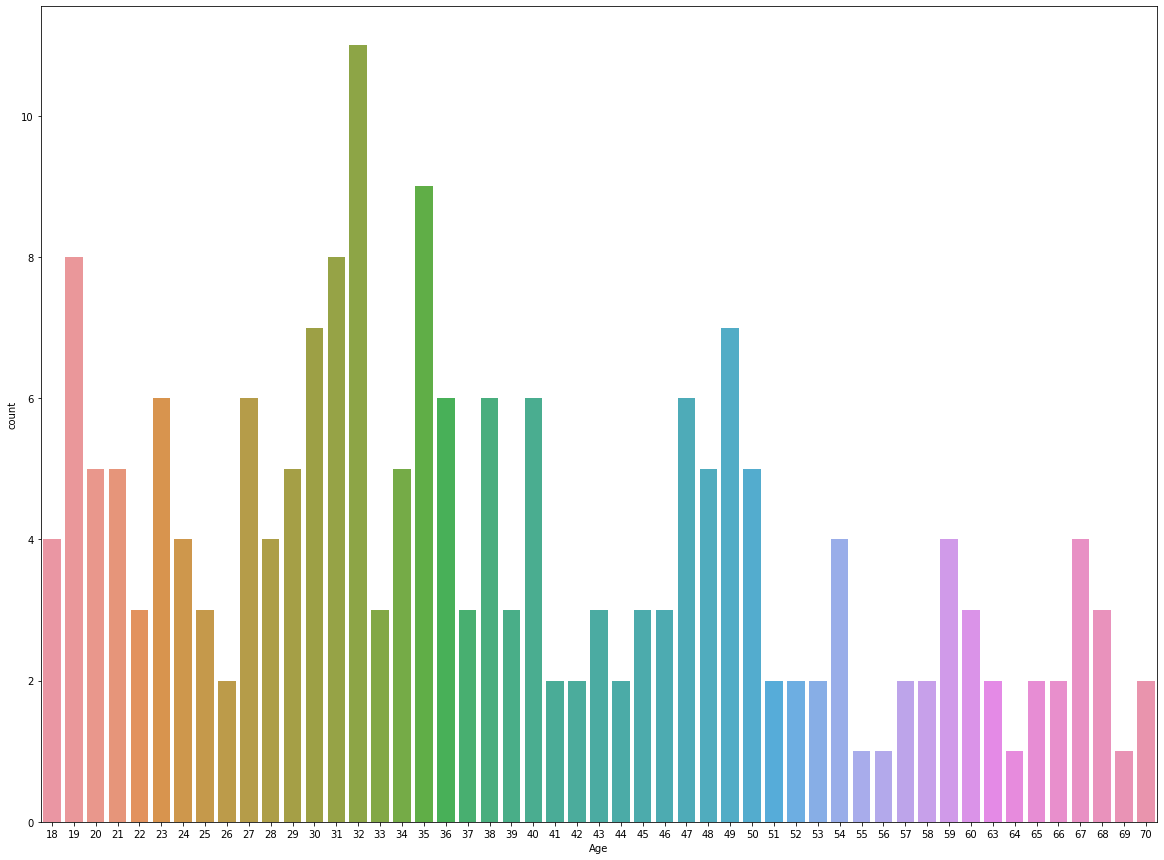

In [10]:
# Plot of Age v/s counts
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='Age')

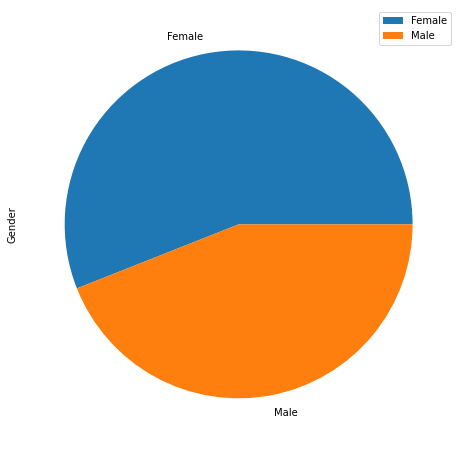

In [11]:
# Pie chart of Males v/s Females visiting the market
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot(kind='pie')
plt.legend()

In [12]:
# Conclusions from the data - 
# 1. Females visit the market more than males
# 2. People between the age of 30-36 visit the market more

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Annual Income')

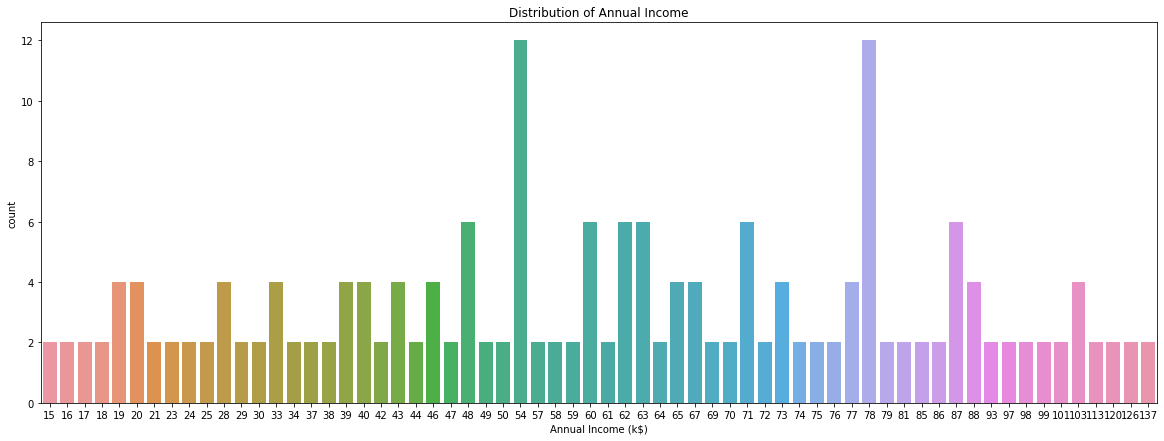

In [13]:
# Distribution of income
plt.figure(figsize=(20,7))
sns.countplot(df['Annual Income (k$)'],data=df)
plt.title('Distribution of Annual Income')

In [14]:
# Conclusions from the data - 
# The customers having salary of 54k$ and 78k$ are visiting the mall more number of times

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

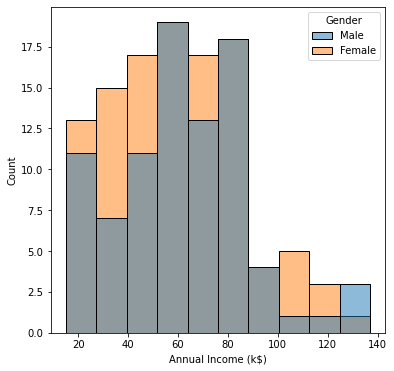

In [15]:
# Annual Income distribution w.r.t. the Gender
plt.figure(figsize=(6,6))
sns.histplot(df,x='Annual Income (k$)',hue='Gender')

In [16]:
# Machine Learning Model
# Categorical encoding - Label Encoding
from sklearn.preprocessing import LabelEncoder

In [17]:
label=LabelEncoder()
df.Gender=label.fit_transform(df.Gender)

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [19]:
# Drop CutomerID as it is not significant
df.drop('CustomerID',axis=1,inplace=True)

In [20]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [21]:
# Choosing appropriate value of k - Elbow method

In [22]:
lst=[]
for i in range(1,11):
    kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
    kmodel.fit(df)
    lst.append(kmodel.inertia_)

C:\Users\Arunima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
# lst contains all the WCSS values
lst

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51165.18423710792,
 44391.82080487078,
 40621.19205794204,
 37098.35568018135]

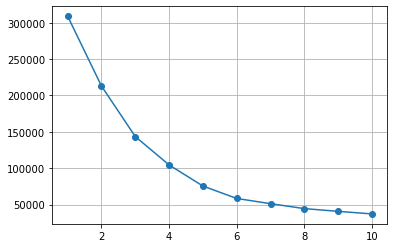

In [24]:
# Plot all the WCSS values to obtain a curve
plt.plot(range(1,11),lst,marker='o')
plt.grid()

In [25]:
# k=6 
# First value where graph decreases very less

In [26]:
kmodel=KMeans(n_clusters=6)
kmodel.fit(df)

KMeans(n_clusters=6)

In [27]:
prediction=kmodel.predict(df)

In [28]:
kmodel.cluster_centers_

array([[ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [29]:
len(kmodel.cluster_centers_)

6

In [30]:
# 6 cluster centers

In [31]:
# New column denoting each data falls in which cluster
df['Cluster']=prediction

In [32]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

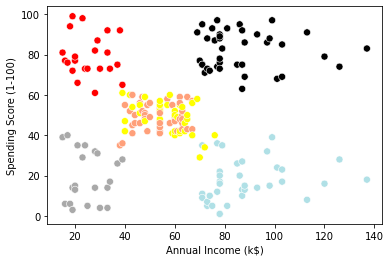

In [33]:
# Scatter plot to show the clusters formed
color=np.array(['darkgray','lightsalmon','powderblue','red','yellow','black'])
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=color[kmodel.labels_],s=50)

In [ ]:
# Conclusions drawn from the scatter plot
# 1. Red cluster - Very less income , high expenditure
# 2. Grey - Less income, less expenditure
# 3. Blue - High income, less expenditure
# 4. Black - High income, high expenditure
# 5. Yellow and Pink - Moderate income, moderate expenditure 

In [34]:
# Hierarchial Clustering
from scipy.cluster.hierarchy import linkage,dendrogram

In [35]:
var=linkage(df,method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [355.0, 355.0, 365

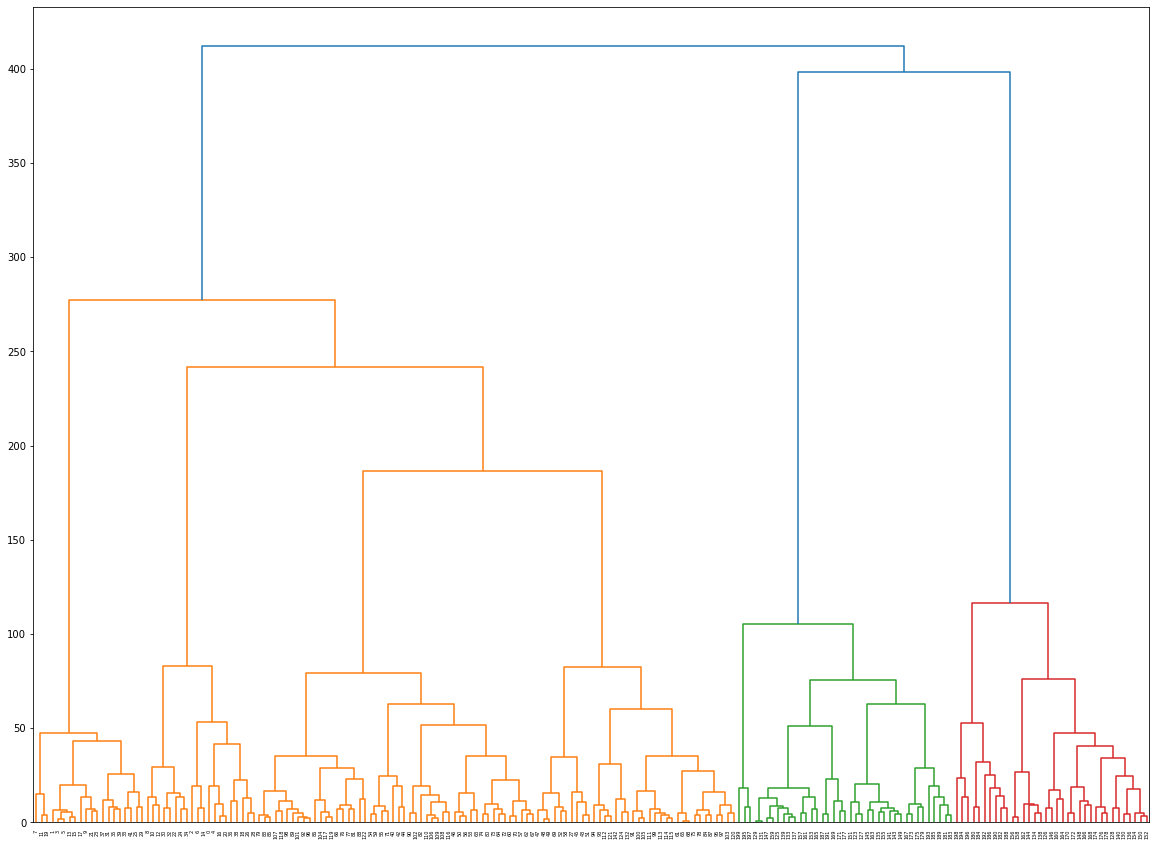

In [36]:
plt.figure(figsize=(20,15))
dendrogram(var)